                        _id     id                      title  runtime  \
0  645856c97cac7f8f8b238b3d  77402           Dawn of the Dead    127.0   
1  645856c97cac7f8f8b238b34  77651                  Halloween     91.0   
2  645856c97cac7f8f8b238b45  77372            Corvette Summer    105.0   
3  645856c97cac7f8f8b238b55  78333                   The Stud     95.0   
4  645856c97cac7f8f8b238b59  77945  Slave of the Cannibal God     99.0   

   user_rating   votes mpaa_rating release_date     budget  opening_weekend  \
0          7.8  119275     Unrated     9/1/1978   650000.0              NaN   
1          7.7  267109       TV-14   10/25/1978   300000.0              NaN   
2          5.6    3251          PG     6/2/1978  9000000.0              NaN   
3          4.2    1010           R    4/12/1978  1000000.0              NaN   
4          5.2    4283           R    5/25/1978        NaN              NaN   

   gross_sales             genres  \
0   55000000.0   Horror, Thriller   
1   70

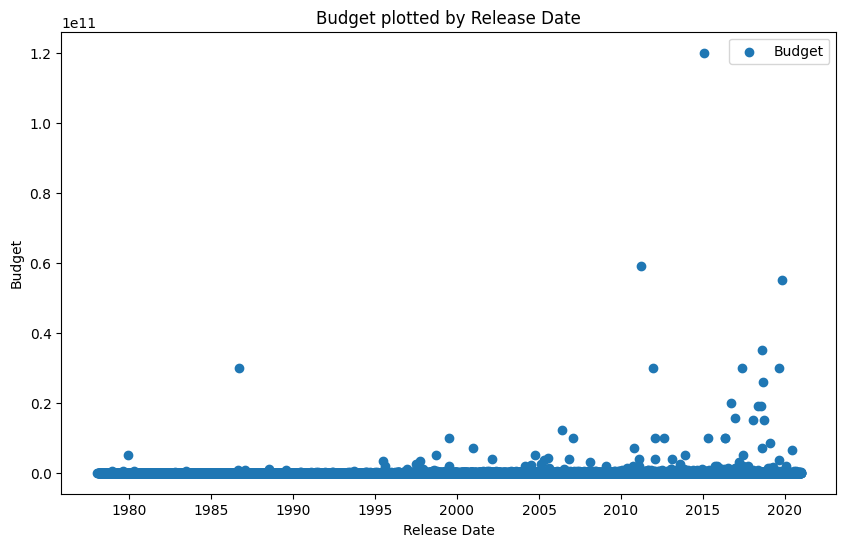

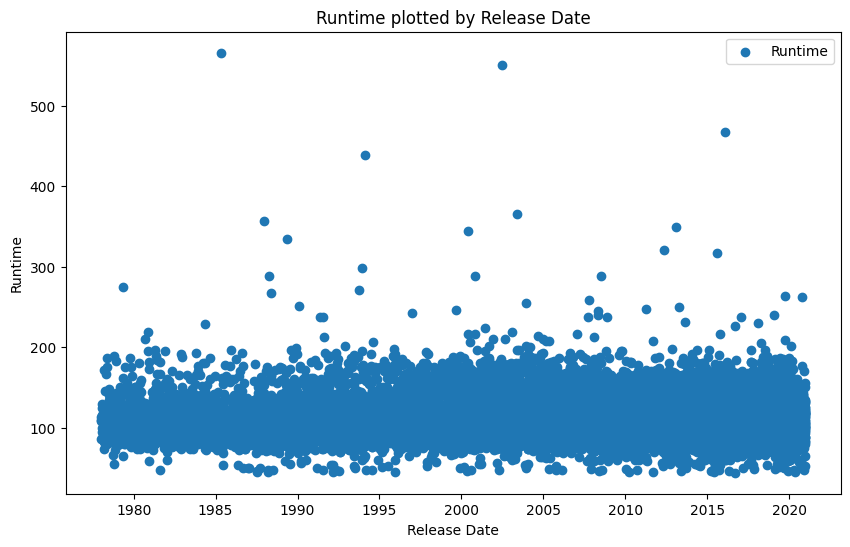

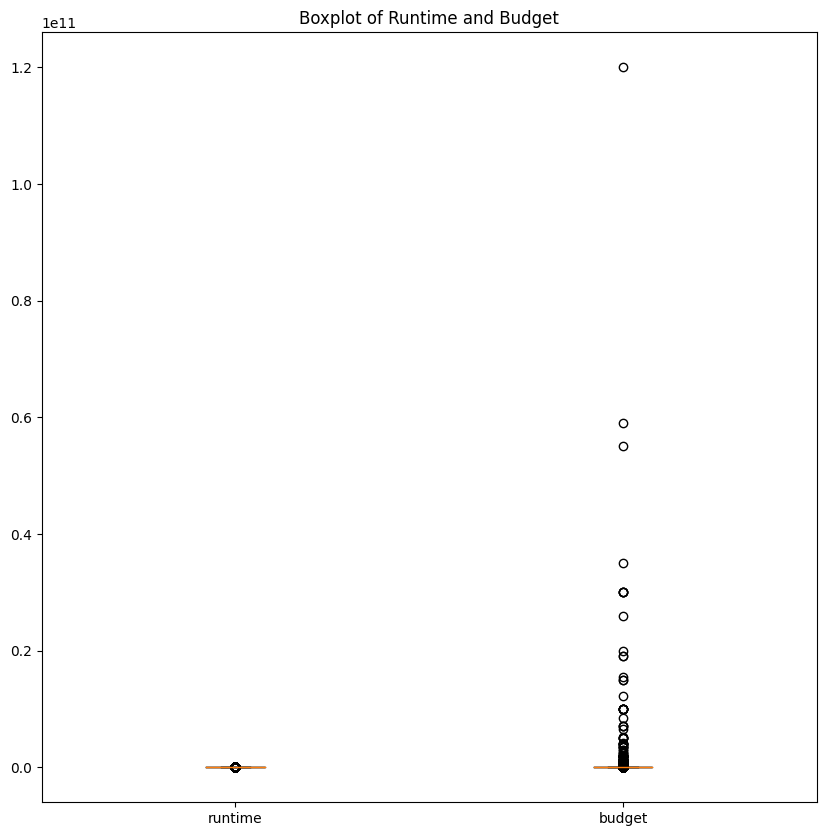

In [3]:
# Importing necessary libraries
import json
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

# Load credentials and establish connection
with open("/Users/ichiro/Desktop/credentials.json") as f:
    data = json.load(f)

# Ensure data is a dictionary
assert isinstance(data, dict), "data should be a dictionary."

# Connect to MongoDB
client = pymongo.MongoClient(data['mongodb'])

# Access your DB and collection
db = client['Mydatabase']  
collection = db['1'] 

# Load data into a DataFrame
df = pd.DataFrame(list(collection.find()))

# Preview the data
print(df.head())

# Information about the DataFrame
print(df.info())

# Summary statistics of the DataFrame
print(df.describe())

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Convert 'runtime' and 'budget' to numeric
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Plot the data
plt.figure(figsize=(10,6))
plt.scatter(df['release_date'], df['budget'], label='Budget')
plt.title('Budget plotted by Release Date')
plt.xlabel('Release Date')
plt.ylabel('Budget')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df['release_date'], df['runtime'], label='Runtime')
plt.title('Runtime plotted by Release Date')
plt.xlabel('Release Date')
plt.ylabel('Runtime')
plt.legend()
plt.show()

# Identify outliers using boxplot
plt.figure(figsize=(10,10))
plt.boxplot([df['runtime'].dropna(), df['budget'].dropna()], labels=['runtime', 'budget'])
plt.title('Boxplot of Runtime and Budget')
plt.show()



Outlier Filtering for 'Runtime' and 'Budget'
Based on the scatter plots and boxplots presented in this analysis, we can observe some outliers in both 'Runtime' and 'Budget' fields.

Runtime:
Looking at the distribution of 'Runtime', we observe that most of the movies have a runtime between about 80 and 200 minutes. However, there are a few movies with extremely high runtime values, which are clearly outliers. A reasonable filter for this column would be to only include movies with a runtime within three standard deviations from the mean. This approach is based on the empirical rule for normal distributions, which states that about 99.7% of the data lies within three standard deviations of the mean.

Budget:
As for the 'Budget' field, we notice a few movies with extraordinarily high budget values. These outliers could skew our analysis and lead to inaccurate conclusions. Hence, it is reasonable to apply a similar filter as we did for 'Runtime'. We can exclude movies whose budgets are more than three standard deviations away from the mean budget.

It's important to note that these are just suggested filters and may not be perfect for all types of analysis. Depending on the specific needs of an analysis, different or additional filters might be more appropriate.

